# One-hot representation

<AxesSubplot:>

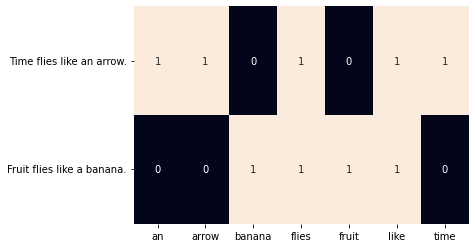

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow.',
          'Fruit flies like a banana.']

one_hot_vectorizer = CountVectorizer(binary=True, lowercase=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names_out()

sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab,
            yticklabels=corpus)

# TF-IDF representation

$\text{tfidf}(w) = \text{tf}(w) * \text{idf}(w)$

* $\text{tf}(w)$ - frequency of $w$ in current document
* $\text{idf}(w) = log_e(\frac{N}{N_w})$ - $N$ is number od documents, $N_w$ is number of times $w$ occurs in all documents.

`TfidfVectorizer` by default uses smooth idf and L2 normalization.
* $\text{smooth_idf}(w) = log_e(\frac{N+1}{N_w+1}) + 1$

See: https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/


<AxesSubplot:>

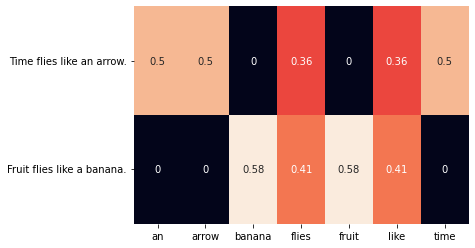

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

corpus = ['Time flies like an arrow.',
          'Fruit flies like a banana.']

tfidf_vectorizer = TfidfVectorizer(lowercase=True)
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
vocab = tfidf_vectorizer.get_feature_names_out()

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels=corpus)

# Creating Tensors

In [ ]:
import torch

scalar = torch.tensor(3.14159)
scalar

In [ ]:
vector = torch.tensor([1, 2, 3])
vector

In [ ]:
matrix = torch.ones((2, 3), dtype=torch.float)
matrix

In [ ]:
tensor = torch.randn((2, 3, 4), dtype=torch.float)
tensor

# Tensor shape

In [ ]:
print(tensor.size(), tensor.shape)

In [ ]:
print(scalar.size(), scalar.shape)

# Reshaping

In [ ]:
same_matrix = matrix.view((1, 6))
same_matrix[0, 1] = 2

print(matrix)
print(same_matrix)

# Creating a filled tensor

In [ ]:
torch.zeros((2, 3))

In [ ]:
torch.ones((2, 3), dtype=torch.int)

In [ ]:
torch.ones((2, 3)).fill_(5)

# Creating and initializing a tensor from lists

In [ ]:
torch.Tensor([[1, 2, 3],
              [4, 5, 6]])

# Creating and initializing a tensor from NumPy

In [ ]:
import torch
import numpy as np

arr = np.random.rand(2, 3)
torch.from_numpy(arr)

# Tensor Operations

In [ ]:
x = torch.randn((2, 3))
x

In [ ]:
torch.add(x, x)

In [ ]:
x + x

# Dimension-based tensor operations

In [ ]:
x = torch.arange(6)
x

In [ ]:
x = x.view(2, 3)
x

In [ ]:
torch.sum(x)

In [ ]:
torch.sum(x, dim=0)

In [ ]:
torch.sum(x, dim=1)

In [ ]:
torch.transpose(x, 0, 1)

In [ ]:
x = torch.arange(24)

In [ ]:
x = x.view((2, 3, 4))
x

In [ ]:
torch.sum(x)

In [ ]:
torch.sum(x, dim=0)

In [ ]:
torch.sum(x, dim=1)

In [ ]:
torch.sum(x, dim=2)

In [ ]:
torch.sum(x, dim=(0, 1))

# Slicing and indexing a tensor

In [ ]:
x = torch.arange(6).view(2, 3)
x

In [ ]:
x[:1, :]

In [ ]:
x[:,:1]

In [ ]:
x[:1, -2:]

In [ ]:
x[1, -2:]

# Complex indexing

In [ ]:
x = torch.arange(6).view(2, 3)
x

In [ ]:
indices = torch.LongTensor([0, 2])
torch.index_select(x, dim=1, index=indices)

In [ ]:
indices = torch.LongTensor([0, 0])
torch.index_select(x, dim=0, index=indices)

In [ ]:
x[[0, 1, 0], [1, 2, 2]]

# Concatenating tensors

In [ ]:
x = torch.arange(6).view(2, 3)
x

In [ ]:
torch.cat([x, x], dim=0)

In [ ]:
torch.cat([x, x], dim=1)

In [ ]:
torch.stack([x, x])

# Linear algebra on tensors

In [ ]:
x1 = torch.arange(6, dtype=torch.float).view(2, 3)
x1

In [ ]:
x2 = torch.ones((3, 2))
x2[:, 1] += 1
x2

In [ ]:
torch.mm(x1, x2)

# Tensors and Computational Graphs

In [ ]:
import torch
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad)

In [ ]:
y = (x + 2) * (x + 5) + 3
print(y)
print(x.grad)

In [ ]:
z = y.mean()
z.backward()
print(z)
print(x.grad)

# CUDA tensors

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
gpu_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpu_device

In [ ]:
x = torch.rand(3, 3).to(gpu_device)
x

In [ ]:
y = torch.rand(3, 3)
y

In [ ]:
x + y

In [ ]:
y = y.to(gpu_device)

In [ ]:
x + y